## 1. Exploratory Data Analysis

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

### 1.1. Variable Distributions

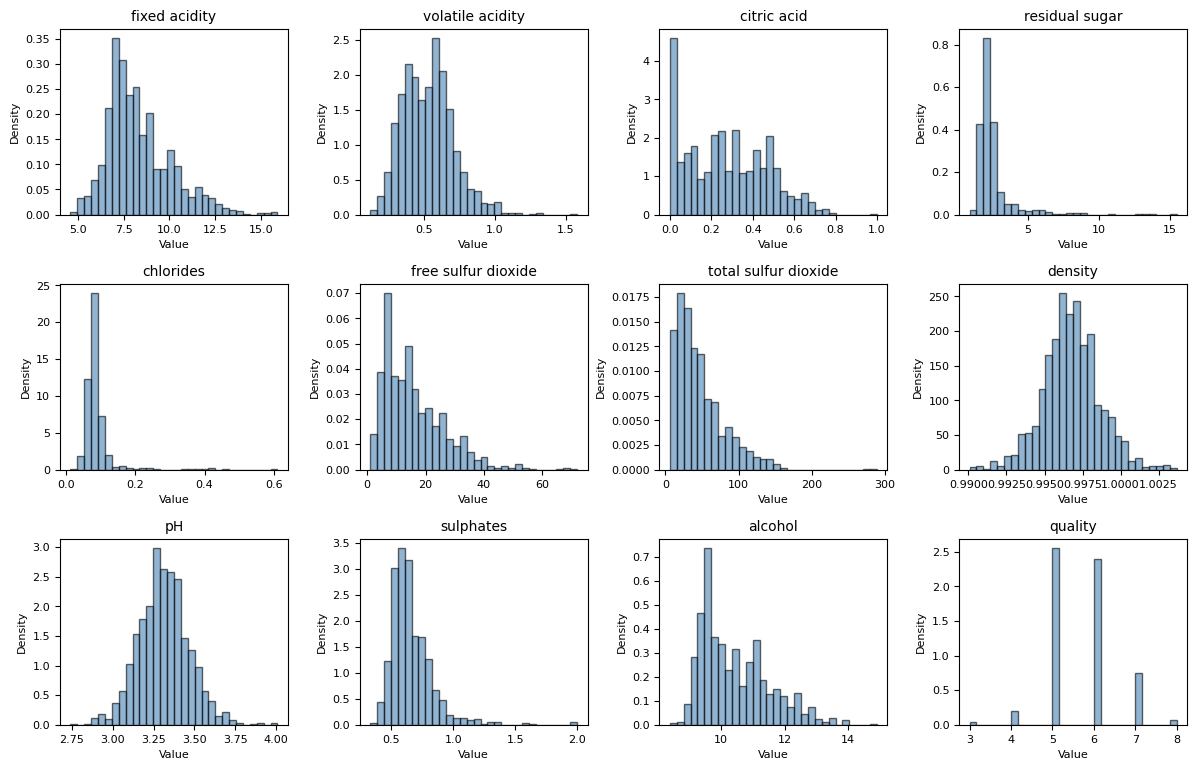

In [ ]:
# Plot histograms of each variable in the dataset

# Determine grid size (n x n variables)
num_features = len(df.columns)
grid_size = math.ceil(math.sqrt(num_features))  # Create an n x n grid

# Set up subplots
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array to easily iterate

# Loop through each feature and plot its histogram
for i, col in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[col], bins=30, density=True, alpha=0.6, color="steelblue", edgecolor="black")
    ax.set_title(col, fontsize=10)
    ax.set_ylabel("Density", fontsize=8)
    ax.set_xlabel("Value", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra empty plots

# Adjust layout for better readability
plt.tight_layout()
plt.show()

### 1.2. Mean & Variance

In [4]:
# Compute a summary of every variable in the dataset

description_summary = []

for col in df.describe().columns:
    desc = df[col].describe()
    description_summary.append([col, desc['count'], desc['mean'], desc['std'], desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']])

# Convert to a DataFrame
description_summary_df = pd.DataFrame(description_summary, columns=['Column', 'Count', 'Mean', 'Std', 'Min', 
                                            '25%', '50%', '75%', 'Max'])

# Display the summary
print(description_summary_df)

# Write the summary table as a csv
description_summary_df.to_csv("description_summary.csv", index=False)

                  Column   Count       Mean        Std      Min      25%  \
0          fixed acidity  1599.0   8.319637   1.741096  4.60000   7.1000   
1       volatile acidity  1599.0   0.527821   0.179060  0.12000   0.3900   
2            citric acid  1599.0   0.270976   0.194801  0.00000   0.0900   
3         residual sugar  1599.0   2.538806   1.409928  0.90000   1.9000   
4              chlorides  1599.0   0.087467   0.047065  0.01200   0.0700   
5    free sulfur dioxide  1599.0  15.874922  10.460157  1.00000   7.0000   
6   total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
7                density  1599.0   0.996747   0.001887  0.99007   0.9956   
8                     pH  1599.0   3.311113   0.154386  2.74000   3.2100   
9              sulphates  1599.0   0.658149   0.169507  0.33000   0.5500   
10               alcohol  1599.0  10.422983   1.065668  8.40000   9.5000   
11               quality  1599.0   5.636023   0.807569  3.00000   5.0000   

         50

### 1.3. Outlier Identification

C:\Users\Saian\AppData\Local\Temp\ipykernel_4688\1508830126.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(df_standardized.values, vert=False, patch_artist=True, labels=df_standardized.columns)


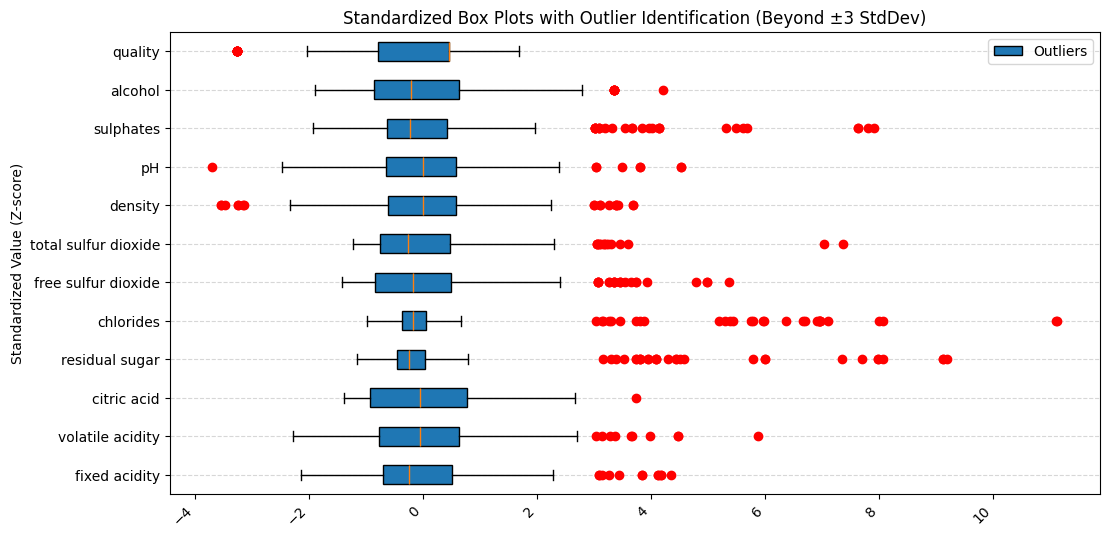

In [ ]:
# Standardize each variable
df_standardized = (df - df.mean()) / df.std()

# Identify outliers: Values beyond ±3 standard deviations
outlier_mask = df_standardized.abs() > 3

# Plot the standardized box plots
plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df_standardized.values, vert=False, patch_artist=True, labels=df_standardized.columns)

# Remove default fliers (black circles)
for flier in boxplot['fliers']:
    flier.set_marker('')  # Hides black circles

# Highlight only extreme outliers (beyond ±3 stddev) with red points
for i, col in enumerate(df_standardized.columns):
    outlier_values = df_standardized[col][outlier_mask[col]]
    plt.scatter(outlier_values, np.full_like(outlier_values, i + 1), color='red', label="Outliers" if i == 0 else "", zorder=3)

# Formatting
# plt.xticks(rotation=45, ha="right", fontsize=10)
plt.xlabel("Standardized Value (Z-score)")
plt.title("Standardized Box Plots with Outlier Identification (Beyond ±3 StdDev)")
plt.legend(["Outliers"], loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()
